# FIN 514 - PS2 Q2 LR
**Spring 2022**

This notebook provides the graphs for PS3 Q1 for the LR model

## Packages and Configurations

The following common packages will be use on this notebook.

* numpy - [https://numpy.org/](https://numpy.org/)
* Pandas - [https://pandas.pydata.org/](https://pandas.pydata.org/)
* matplotlib - [https://matplotlib.org/](https://matplotlib.org/)
* Scipy Statistical functions - [https://docs.scipy.org/doc/scipy/reference/stats.html](https://docs.scipy.org/doc/scipy/reference/stats.html)


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
# ENTER INPUT FOR: start_step

start_step = 51

In [3]:
# ENTER INPUT FOR: N = num_steps

N = 1000

In [4]:
# ENTER INPUT FOR: S0 = Original Stock Price

S0 = 100.0

In [5]:
# ENTER INPUT FOR: K = Excercise Price of Call Option

K = 105.0

In [6]:
# ENTER INPUT FOR: sigma = Annualized (Future) Volatility of Stock Price Returns

sigma = 0.2

In [7]:
# ENTER INPUT FOR: r = Annualized Continously Compounded Risk-free Rate

r = 0.01

In [8]:
# ENTER INPUT FOR: T = Time Length of Option in which to Exercise (In Years)

T = 0.5

In [9]:
# ENTER INPUT FOR: q = Rate of continuous dividend paying asset 

q = 0

In [10]:
# ENTER INPUT FOR: whether option is call (1) or put (0)
cp = 0

## Black-Sholes Model 

In [11]:
def black_scholes(S0, K, T, r, q, sigma, cp):
    """
    Function to calculates the value of a European Call Option using Black Scholes 
    
    S0: Original Stock Price
    K: Excercise Price of Call Option
    T: Time Length of Option in which to Exercise (In Years)
    r: Annualized Continously Compounded Risk-free Rate
    q: Rate of continuous dividend paying asset 
    sigma: Annualized (Future) Volatility of Stock Price Returns
    
    """
    
    cdf_mean = 0.0
    cdf_sd = 1.0
    
    d1 = (np.log(S0 / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S0 / K) + (r - q - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    if cp == 1:
        value = S0 * np.exp(-q * T) * st.norm.cdf(d1, cdf_mean, cdf_sd) 
        value = value - K * np.exp(-r * T) * st.norm.cdf(d2, cdf_mean, cdf_sd) 
    else:
        value = -S0 * np.exp(-q * T) * st.norm.cdf(-d1, cdf_mean, cdf_sd) 
        value = value + K * np.exp(-r * T) * st.norm.cdf(-d2, cdf_mean, cdf_sd) 
    
    return value

## Binomial Model Function

In [12]:

def LRE_model(S0, K, T, r, sigma, start_step, N):
    """
    Function to calculates the value of a European Put Option using the CRR Binomial Model 
    
    S0: Original Stock Price
    K: Excercise Price of Call Option
    T: Time Length of Option in which to Exercise (In Years)
    r: Annualized Continously Compounded Risk-free Rate
    sigma: Annualized (Future) Volatility of Stock Price Returns
    start_step: Starting time step
    N: Number of time steps
    
    """    
    
    # LIST TO SAVE RESULTS
    lre_result = []
        
    # CREATE TWO DIMENSIONAL ARRAY OF SIZE [N+1,N+1] TO STORE ALL STEPS
    # option_value[N+1, N+1]
    option_value = np.zeros([N+1, N+1])

    # CREATE ARRAY FOR STOCK PRICES OF SIZE N+1,N+1
    # stock_value[N+1, N+1]
    stock_value = np.zeros([N+1, N+1])    
    
    # FOR LOOP STATEMENT: For a Binomial Tree from start_step to N
    for n in range(start_step, N+1,2):
        delta = T / n
        d1 = (np.log(S0 / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        d2 = (np.log(S0 / K) + (r - q - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        qu = 0.5 + np.sqrt(0.25-0.25*np.exp(-(d2/(n+1/3))**2*(n+1/6)))
        if d2 < 0: 
            qu = 0.5 - np.sqrt(0.25-0.25*np.exp(-(d2/(n+1/3))**2*(n+1/6)))
        qd = 1 - qu    
        qstar = 0.5 + np.sqrt(0.25-0.25*np.exp(-(d1/(n+1/3))**2*(n+1/6)))
        if d1 < 0: 
            qstar = 0.5 - np.sqrt(0.25-0.25*np.exp(-(d1/(n+1/3))**2*(n+1/6)))
        u = np.exp((r-q)*delta)*qstar/qu
        d = (np.exp((r-q)*delta)-qu*u)/(1-qu)
        
    # CALCULATE OPTION VALUES AT CERTAIN STEPS AND POSITIONS WITHIN THE BINOMIAL TREE:
        j = n 
        
        for i in range(0, j):    
            stock_value[j, i] = S0 * (u**i) * (d**(j - i))
            option_value[j, i] = np.maximum(K - stock_value[j, i], 0)

        for j in range(n-1, -1, -1):
            for i in range(j, -1, -1):
                pv = np.exp(-r * delta) * (qu * option_value[j + 1, i + 1] + qd * option_value[j + 1, i])
                option_value[j, i] = pv
    # RELAY OUTPUTS TO DICTIONARY
        output = {'num_steps': n, 'LR': option_value[0,0]}
        lre_result.append(output)

    return lre_result


In [13]:
lr = LRE_model(S0, K, T, r, sigma, start_step, N)

In [14]:
bsc_value = black_scholes(S0, K, T, r, q, sigma,cp)
bsc_value

8.27511717853504

In [15]:
# CREATE A DATAFRAME FROM THE BINOMIAL MODEL OUTPUT
df = pd.DataFrame.from_dict(lr)

In [16]:
# CALCULATE THE ERROR FROM BINOMIAL MODEL COMPARED WITH BLACK-SHCOLES
df['error_LR'] = df["LR"] - bsc_value 

In [17]:
# INSPECT THE FIRST ROWS OF THE DATAFRAME
df.head()

,num_steps,LR,error_LR
0,51,8.275230,0.000113
1,53,8.275222,0.000105
2,55,8.275214,0.000097
3,57,8.275208,0.000091
4,59,8.275202,0.000085


In [18]:
# INSPECT THE LAST ROWS OF THE DATAFRAME
df.tail()

,num_steps,LR,error_LR
470,991,8.275117,3.051037e-07
471,993,8.275117,3.038904e-07
472,995,8.275117,3.026647e-07
473,997,8.275117,3.014600e-07
474,999,8.275117,3.002441e-07


In [19]:
# EXPORT THE DATA TO A CSV FILE
df.to_csv("Data/Q1lre.csv", index=False)

### Binomial Model Error Rate

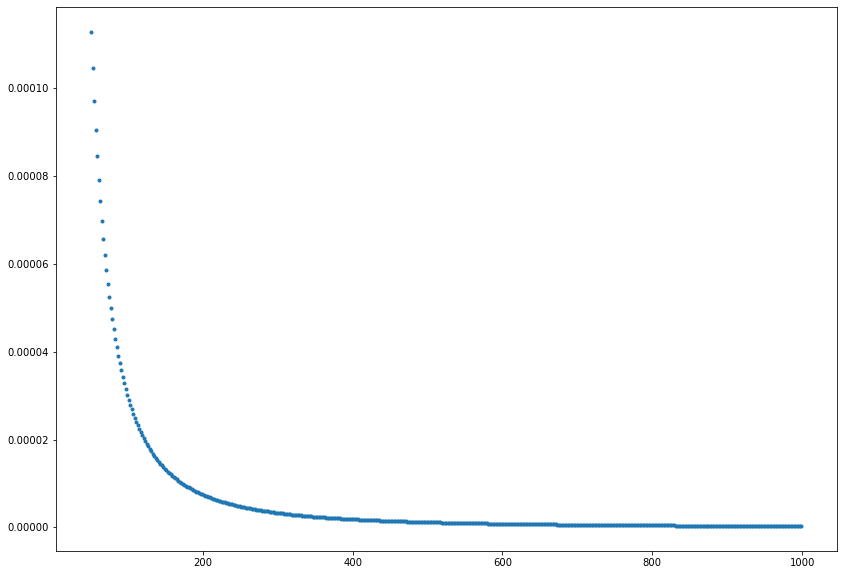

In [20]:
plt.figure(figsize=(14,10))
plt.plot(df['num_steps'], df['error_LR'], 'o', markersize=3)
plt.savefig('Images/Q1_lre.png')
plt.show()